# Predição de preço de imóveis
O objetivo deste projeto é desenvolver um modelo de previsão de preços de venda de casas em Ames, Iowa, usando técnicas de machine learning. Previsões precisas dos preços das casas são importantes para compradores, vendedores e investidores, pois podem ajudar a tomar decisões informadas e monitorar as tendências do mercado.over o crescimento econômico.

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


# Carregando Dados

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Análise Exploratória dos Dados

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.shape

(1460, 81)

In [7]:
# Verifica se existe linhas duplicadas no dataframe de treino
df_train[df_train.duplicated()].count().sum()

0

In [8]:
# Verifica se existe linhas duplicadas no dataframe de teste
df_test[df_test.duplicated()].count().sum()

0

Análise de distribuição da variável alvo (SalePrice):

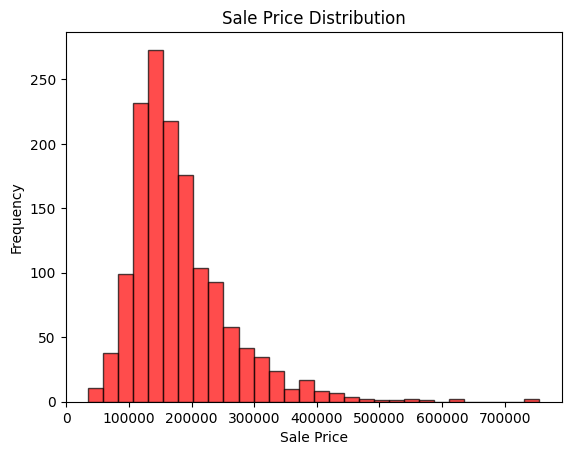

In [9]:
# Plota a distribuição
plt.hist(df_train['SalePrice'], bins=30, alpha=0.7, color='red', edgecolor='black')

# titulo
plt.title('Sale Price Distribution')

# Etiqueta dos eixos
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Exibe o gráfico
plt.show()

Correlação entre variáveis numéricas

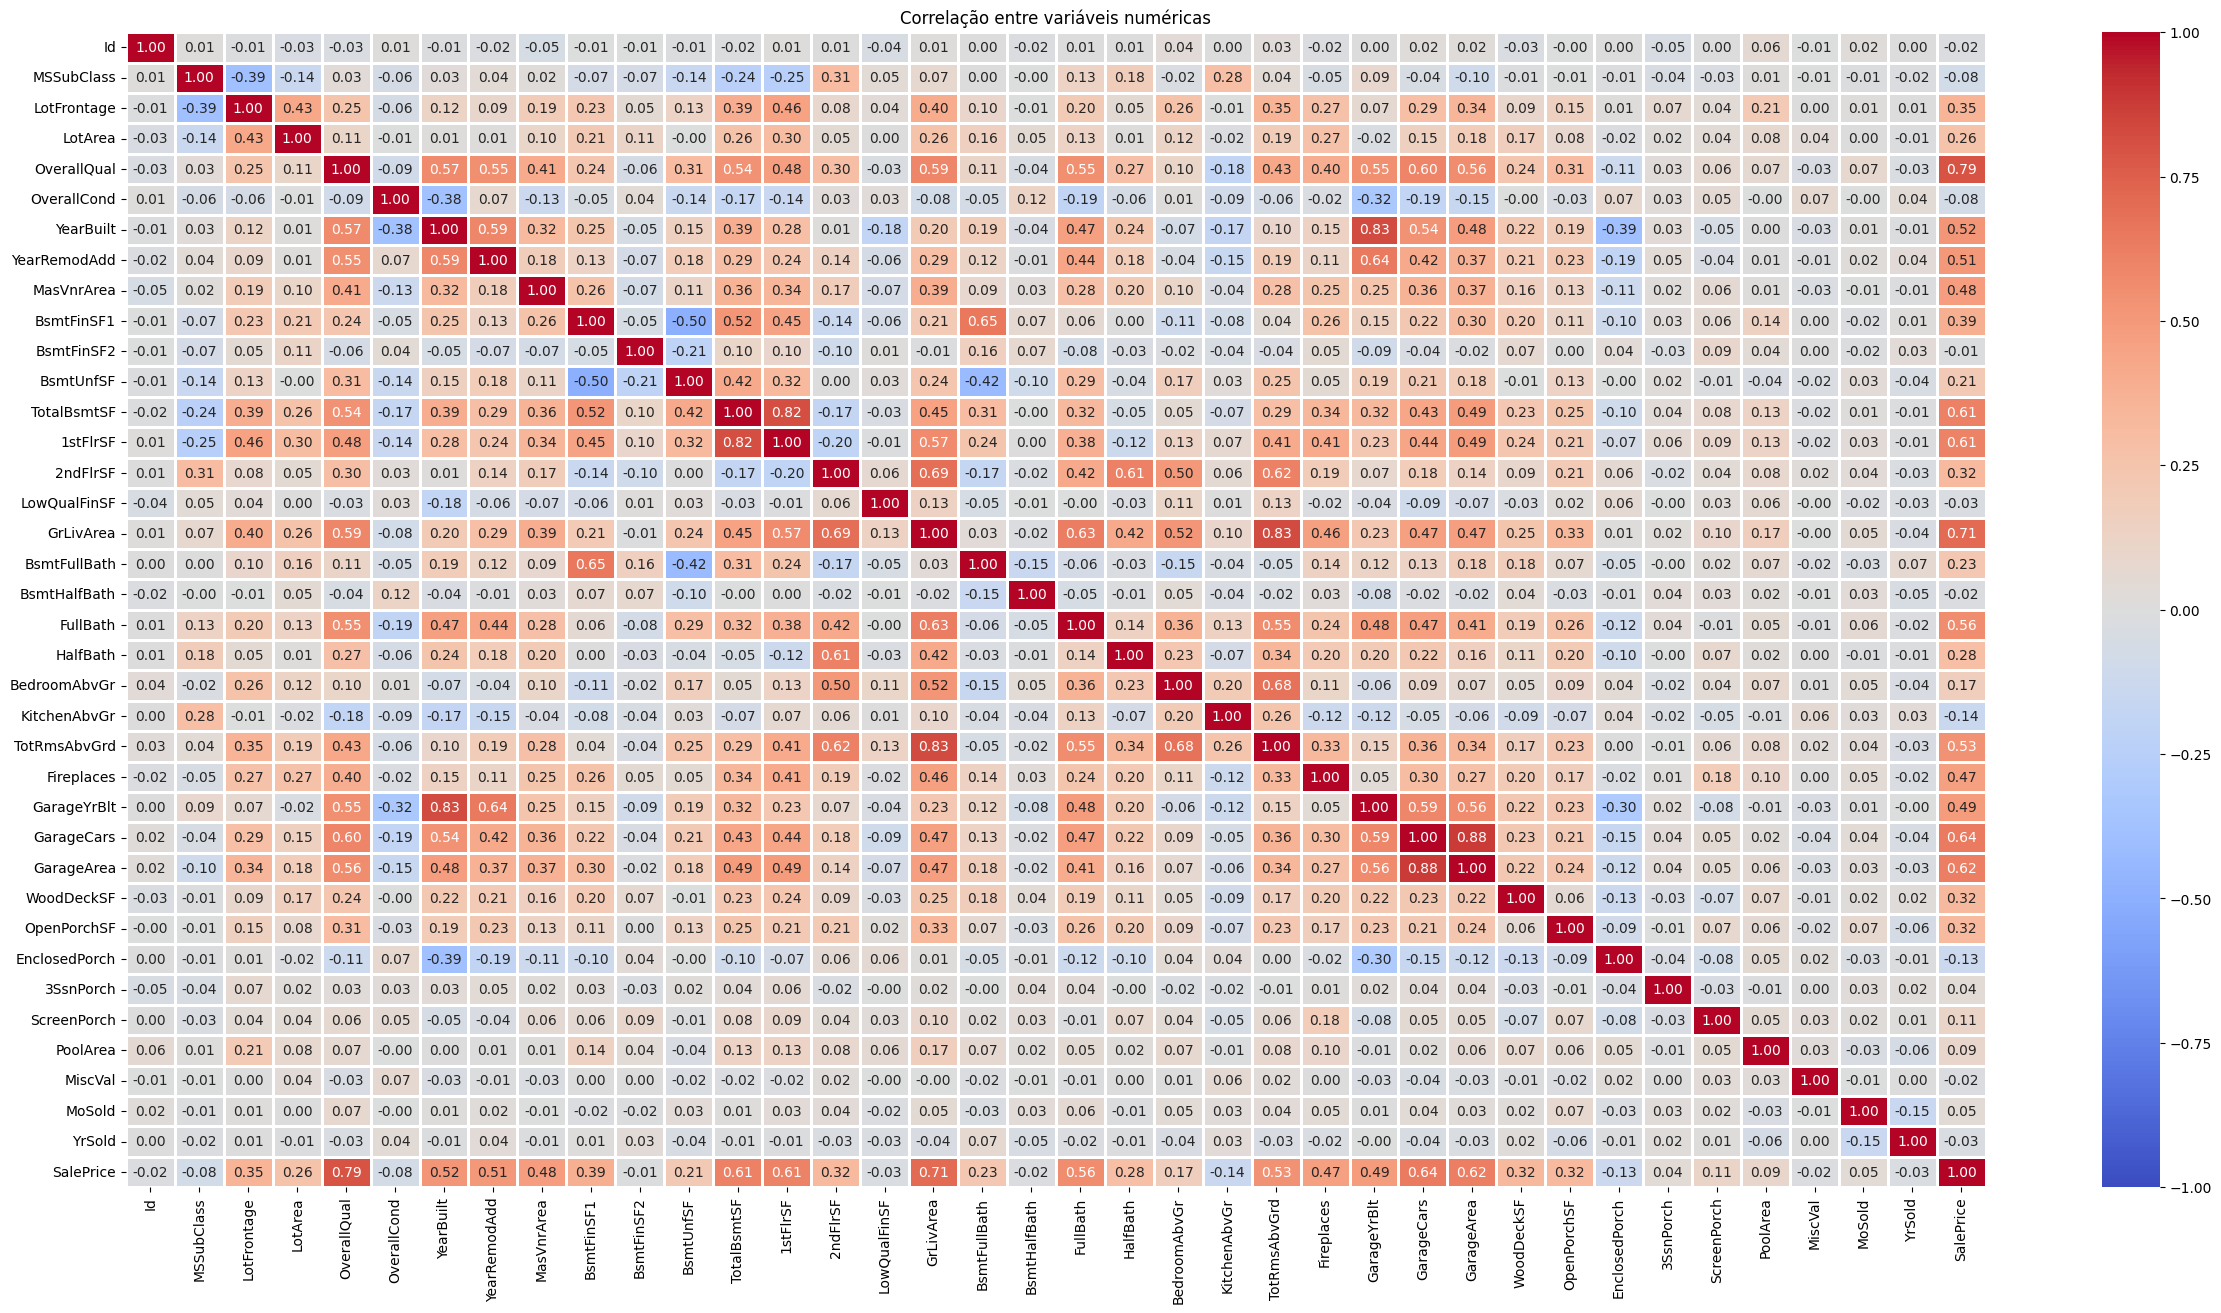

In [10]:
# Seleciona apenas as colunas numéricas do dataframe
numeric_columns = df_train.select_dtypes(include=[np.number])

# Calcula a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Plota o mapa de calor
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidth=1, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()


Selecionando variaveis com uma correlação maior que 0.5:

In [11]:
corrmat = numeric_columns.corr()
corr_threshold = 0.5
cols = corrmat[corrmat['SalePrice'] >= corr_threshold]['SalePrice'].index
correlated_variables = cols.tolist()
print(correlated_variables)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


Visualização gráfica das variáveis selecionadas acima:

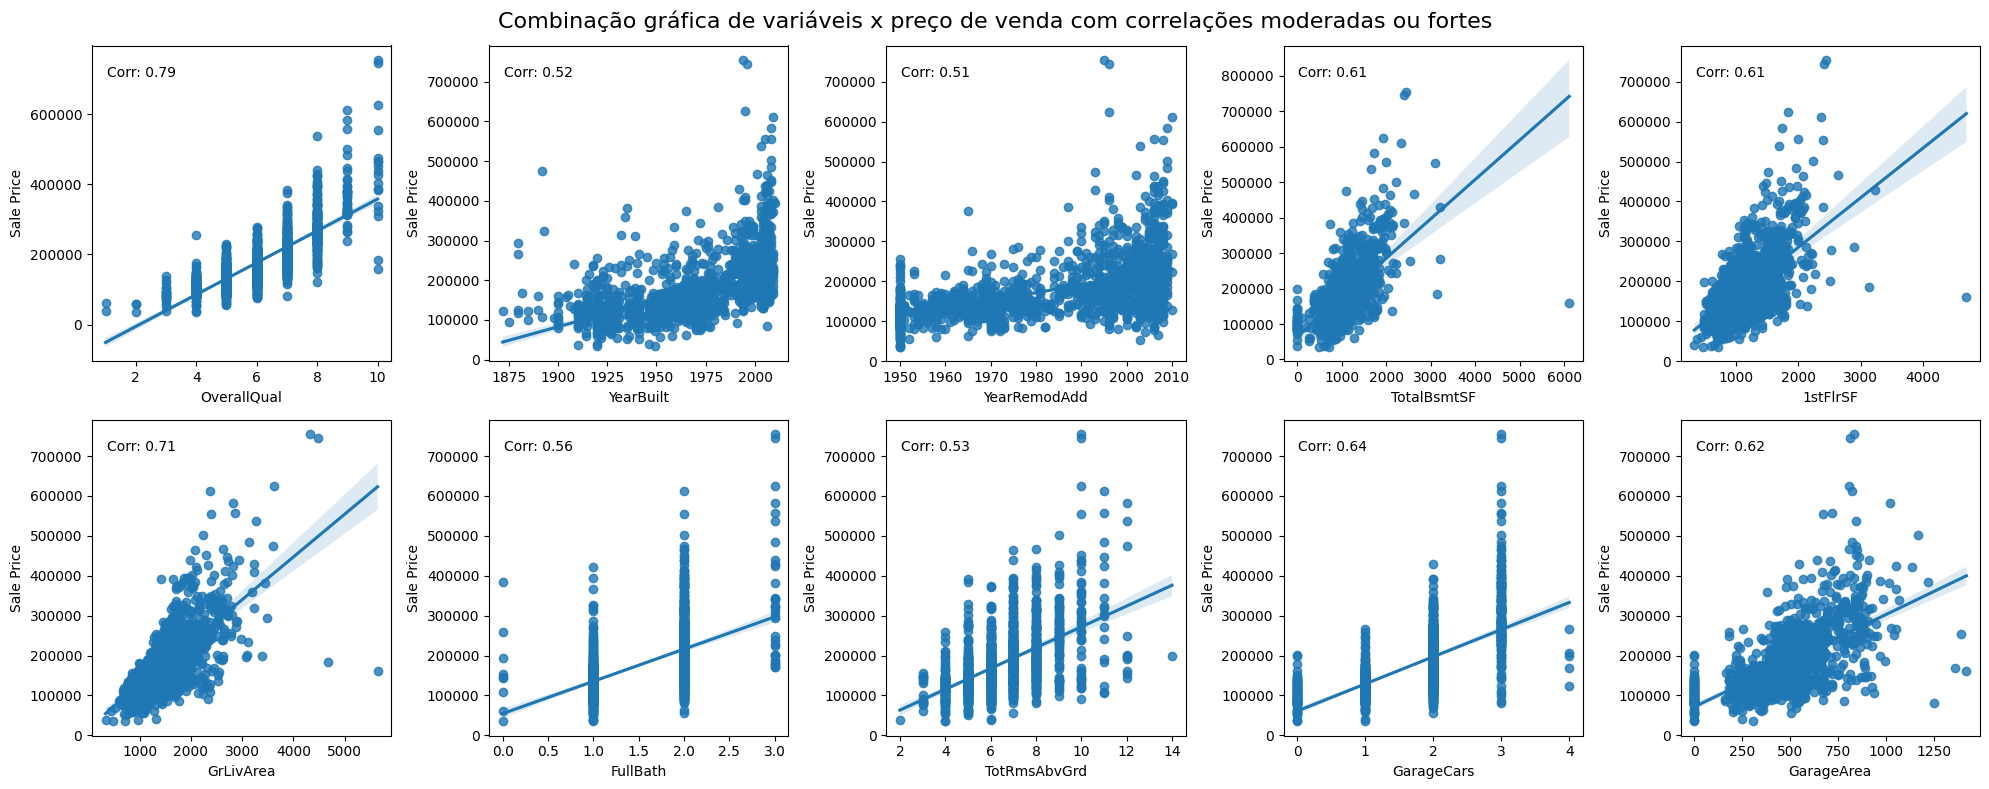

In [12]:
# Remove as linhas com valores ausentes nas variáveis selecionadas
filtered_data = df_train.dropna(subset=correlated_variables)

# Move a coluna 'SalePrice' para uma nova variável
target_variable = filtered_data['SalePrice']

# O código abaixo cria um objeto 'fig' e um objeto 'ax' para representar um conjunto de gráficos de dispersão. 
# O objeto 'fig' representa o conjunto de gráficos de dispersão como um todo, enquanto o objeto 'ax' representa cada gráfico de dispersão individual.
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

# Garante que cada variável na lista correlated_variables seja plotada em um subplot diferente.
for i, var in enumerate(correlated_variables[:-1]):  # exclui a última variável da lista correlated_variables. A última variável é a variável alvo, que não deve ser plotada nos gráficos de dispersão.
    row = i // 5  # calcula o índice da linha com base no índice da iteração.
    col = i % 5   # calcula o índice da coluna com base no índice da iteração.
    
    # Cria um gráfico de dispersão com linha de regressão
    sns.regplot(data=filtered_data, x=var, y='SalePrice', ax=ax[row, col])
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel('Sale Price')

    # Calcula o coeficiente de correlação
    corr = filtered_data[var].corr(target_variable)
    
    # Adiciona o coeficiente de correlação como anotação de texto
    ax[row, col].text(0.05, 0.9, f'Corr: {corr:.2f}', transform=ax[row, col].transAxes)
    
fig.suptitle('Combinação gráfica de variáveis ​​x preço de venda com correlações moderadas ou fortes', fontsize=16)
plt.tight_layout()  # Ajusta o layout para evitar plotagens sobrepostas
plt.show()

***Correlações fortes e moderadas entre variáveis ​​e preço de venda:***
OverallQualal*: Quanto maior for a qualidade geral do imóvel, maior será o preço de venda. Essa correlação é forte.

*GrLivArea*: Quanto maior for a área residencial acima do solo (solo) em metros quadrados, maior será o valor de venda do imóvel. Esta correlação é forte, com alguns valores discrepantes e dispersão de dados à medida que a área habitacional aumenta.

*GarageCars*: Quanto maior a capacidade de carros na garagem, maior será o preço de venda. Essa correlação é moderada.

*GarageArea*: Quanto maior for a área da garagem, maior será o preço de venda. Essa correlação também é moderada.
P.S.: é óbvio que estas duas variáveis ​​são fortemente correlacionadas (como observamos no gráfico de correlação, a correlação de GarageCars e GarageArea é 0,88). Portanto, não precisamos usar ambos no modelo. Manteremos GarageCars, pois é a correlação mais alta.

*TotalBsmtSF*: Quanto maior for o total de metros quadrados da área do subsolo, maior será o preço de venda do imóvel. Esta correlação é moderada, com alguns valores discrepantes e dispersão de dados à medida que o tamanho do porão YearBuiltde Construção*: Quanto mais recente for a construção do imóvel, maior será o valor de venda. Essa correlação é moderada.

*YearRemodAdd*: Quanto mais recente for a reforma do imóvel, maior será o preço de venda. Essa correlação é moderada.

*1stFlrSF*: Quanto maior for a área do primeiro andar em metros quadrados, maior será o preço de venda do imóvel. Esta correlação é moderada, com alguns valores discrepantes e dispersão de dados à medida que o tamanho do primeiro andar aumenta.

*FullBath*: Quanto mais banheiros completos, maior será o preço de venda. Essa correlação é moderada.

*TotRmsAbvGrd*: Quanto mais quartos acima do solo, maior será o preço de venda. Essa correlação é moderada.

Pode-se plotar gráficos de correlação entre outras variáveis para uma analise visual:

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

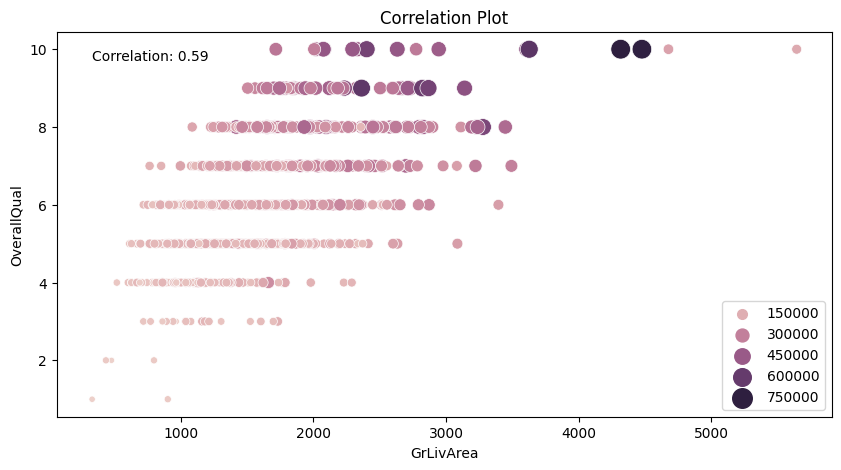

In [13]:
x= df_train['GrLivArea']
y= df_train['OverallQual']
plt.figure(figsize=(10,5))

sns.scatterplot(data=df_train, x=x, y=y, hue="SalePrice", size="SalePrice", sizes=(20, 200))
plt.legend(loc='lower right')

plt.title('Correlation Plot')
correlation = np.corrcoef(x, y)[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'
plt.text(x.min(), y.max(), correlation_text, ha='left', va='top')

plt.show()

Em geral, existe uma correlação positiva entre a qualidade geral da propriedade e a metragem quadrada da área construída. Além disso, à medida que ambas as variáveis ​​aumentam, o valor do imóvel também tende a subir.

>***Aqui estão alguns gráficos com possíveis interações de recursos significativas:***
>
> * Preços de venda de casas por ano.
> * Preços de venda de casas por região.
> * Preços de venda de casas por “idade”.
> * Preços de venda de casas por “Overall Quality”.

Média do preço de venda de casas por ano:

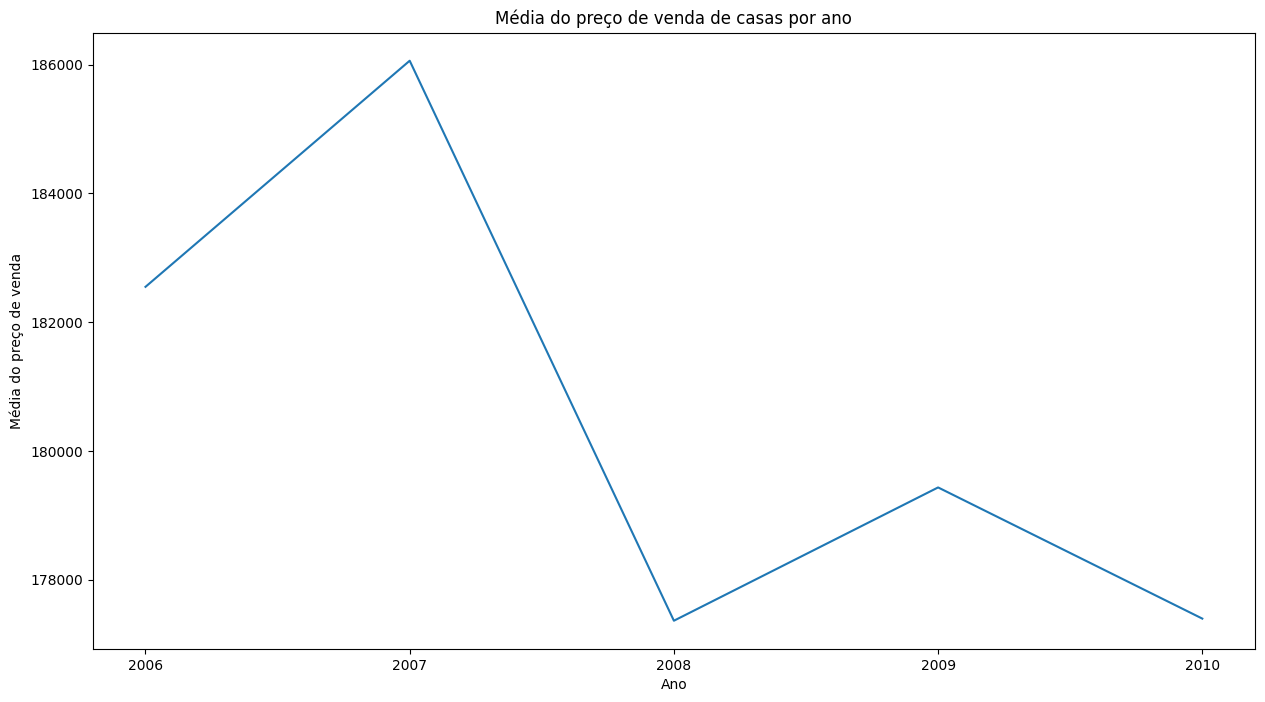

In [14]:
# Calcula a média do preço de venda de casas para cada ano
mean_prices = df_train.groupby('YrSold')['SalePrice'].mean()

# Cria um gráfico de linha com a média do preço de venda
plt.figure(figsize=(15, 8))
plt.plot(mean_prices.index, mean_prices.values)

# Configura o rótulo do eixo x
plt.xlabel('Ano')

# Configura o rótulo do eixo y
plt.ylabel('Média do preço de venda')

# Configura o título do gráfico
plt.title('Média do preço de venda de casas por ano')

# Formata os rótulos do eixo x como números inteiros
plt.xticks(mean_prices.index.astype(int))

# Exibe o gráfico
plt.show()

**2008**: A crise da bolha imobiliária nos Estados Unidos, comumente chamada de crise do subprime, causou uma diminuição significativa nos preços médios de venda de imóveis.

Valor das casas vendidas por região:

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


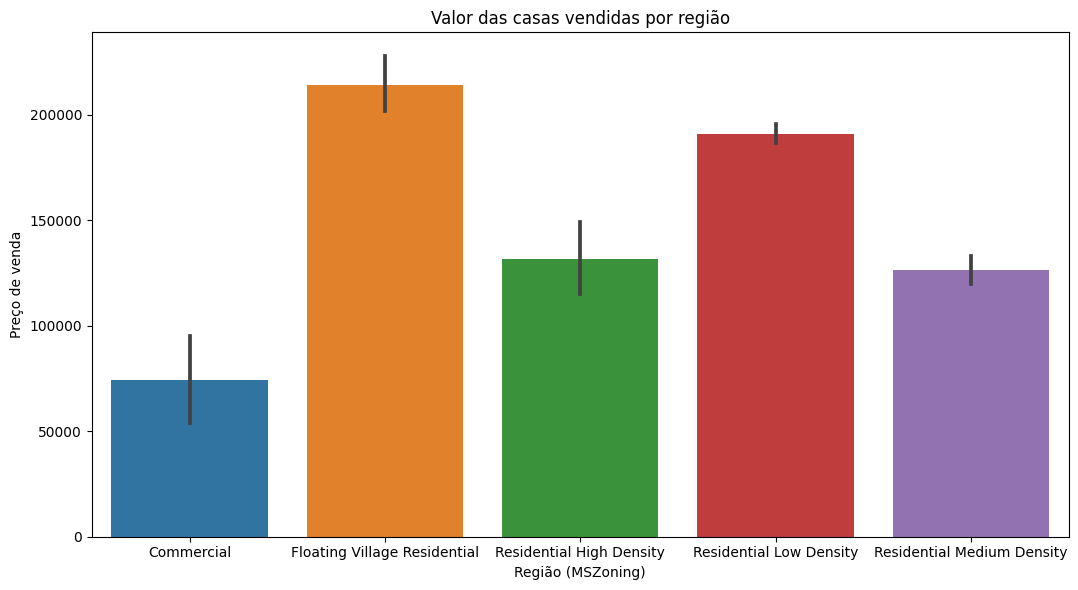

In [15]:
# Cria uma cópia do DataFrame `train_data` para manter os dados originais intactos
plot_data = df_train.copy()

# Define um mapa de nomes de categorias para nomes estendidos
zone_mapping = {
    'A': 'Agriculture',
    'C (all)': 'Commercial',
    'FV': 'Floating Village Residential',
    'I': 'Industrial',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP': 'Residential Low Density Park',
    'RM': 'Residential Medium Density'
}

# Substitui os nomes de categorias no DataFrame `plot_data` pelos nomes estendidos
plot_data['MSZoning'] = plot_data['MSZoning'].replace(zone_mapping)

# Obtém os nomes estendidos únicos em ordem alfabética
ordered_zones = sorted(plot_data['MSZoning'].unique())

# Cria um gráfico de barras com os valores da variável `SalePrice` como barras para cada categoria na variável `MSZoning`
plt.figure(figsize=(11, 6))
sns.barplot(data=plot_data, x='MSZoning', y='SalePrice', order=ordered_zones)

# Configura o título, rótulos de eixos e um layout ajustado para evitar que os rótulos se sobreponham
plt.xlabel('Região (MSZoning)')
plt.ylabel('Preço de venda')
plt.title('Valor das casas vendidas por região')
plt.tight_layout()

# Exibe o gráfico
plt.show()

O gráfico de barras mostra que as regiões Agriculture, Industrial e RL (Residential Low Density Park) não têm registros disponíveis. Isso significa que não há casas vendidas nestas regiões no conjunto de dados.


As regiões FV (Floating Village Residential) e RH (Residential High Density) têm as médias de preço de venda mais altas. Isso significa que as casas vendidas nestas regiões tendem a ser mais caras.


As regiões RM (Residential Medium Density) e RP (Residential Low Density Park) têm as médias de preço de venda intermediárias. Isso significa que as casas vendidas nestas regiões têm preços médi
.
A região C (all) (Commercial) tem a média de preço de venda mais baixa. Isso significa que as casas vendidas nesta região tendem a ser maiaratas.s

s.
A análise sugere que a região em que uma casa está localizada pode ser um fator importante que influencia o seu preço de venda. Casas em regiões com preços de venda mais altos tendem a ser mais caras, enquanto casas em regiões com preços de venda mais baixos tendem a ser mais baratas.

Comparação Preço de Venda vs Faixa etária da Casa:

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


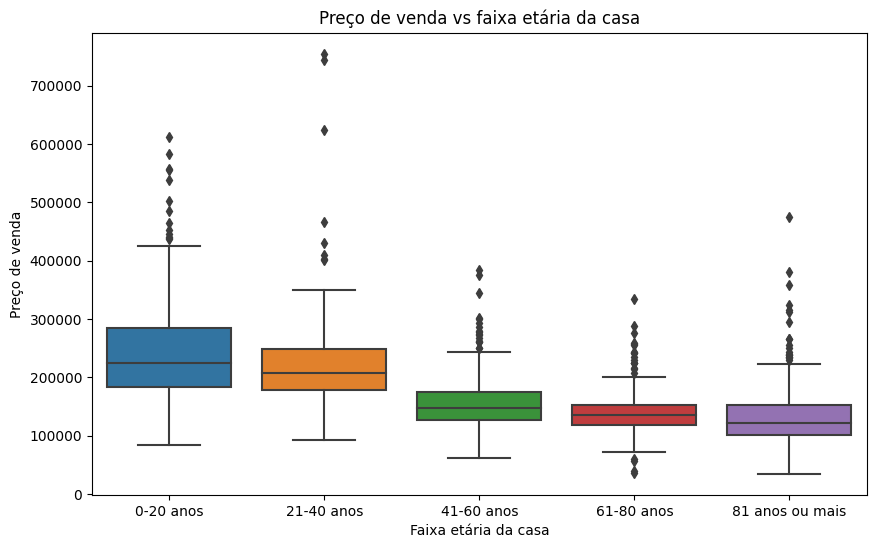

In [16]:
# Importa o módulo datetime para calcular a idade de cada casa
import datetime

# Calcula a idade de cada casa subtraindo o ano atual do ano em que a casa foi construída
current_year = datetime.datetime.now().year
df_train['HouseAge'] = current_year - df_train['YearBuilt']

# Define as faixas de idade
age_bins = [0, 20, 40, 60, 80, float('inf')]
age_labels = ['0-20 anos', '21-40 anos', '41-60 anos', '61-80 anos', '81 anos ou mais']

# Atribui as faixas de idade a cada casa
age_range = pd.cut(df_train['HouseAge'], bins=age_bins, labels=age_labels)

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_range, y=df_train['SalePrice'])
plt.xlabel('Faixa etária da casa')
plt.ylabel('Preço de venda')
plt.title('Preço de venda vs faixa etária da casa')

plt.show()

Nesta análise, determinamos o valor de venda do imóvel com base na sua idade.

Constatamos que as casas nas faixas de 0-20 e 21-40 anos são altamente valorizadas e possuem um preço médio de venda mais elevado em comparação com os outros grupos (41-60, 61-80 e 81+), que apresentam valores médios semelhantes. entre eles.

Incluiremos 'HouseAge' como uma nova variável no dataframe.

Relação entre o nível de qualidade geral(overall quality) de uma casa e o seu preço de venda:

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


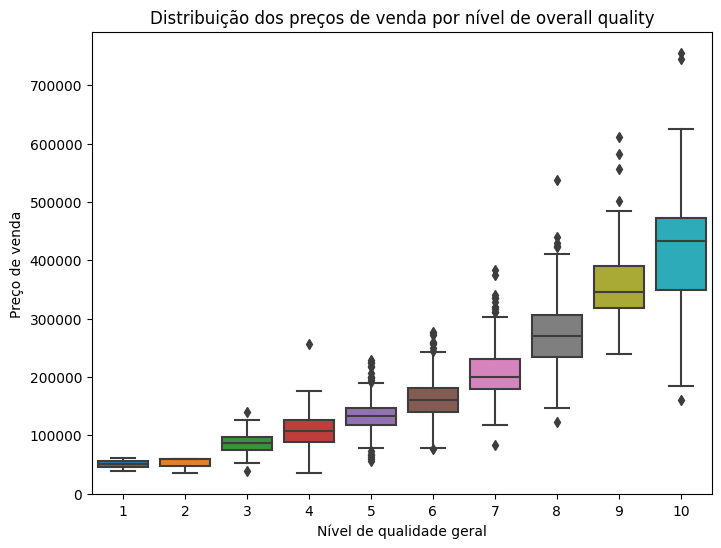

In [17]:
# Cria uma figura com o tamanho de 8 x 6 polegadas
plt.figure(figsize=(8, 6))

# Usa o pacote seaborn para criar um gráfico de caixa
# O gráfico de caixa mostra a distribuição dos preços de venda
# para cada nível de qualidade geral
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice')

# Configura os rótulos dos eixos x e y
plt.xlabel('Nível de qualidade geral')
plt.ylabel('Preço de venda')

# Configura o título do gráfico
plt.title('Distribuição dos preços de venda por nível de overall quality')

# Exibe o gráfico
plt.show()


Uma tendência notável pode ser observada nesta análise, onde o preço médio de venda da casa aumenta em relação à variável overall quality.

*Verificar se combinar as features de dimensões da casa é mais vatajoso do que analisa-las individualmente!

Relação entre o tamanho do primeiro e segundo andares e do porão com o preço de venda da casa:


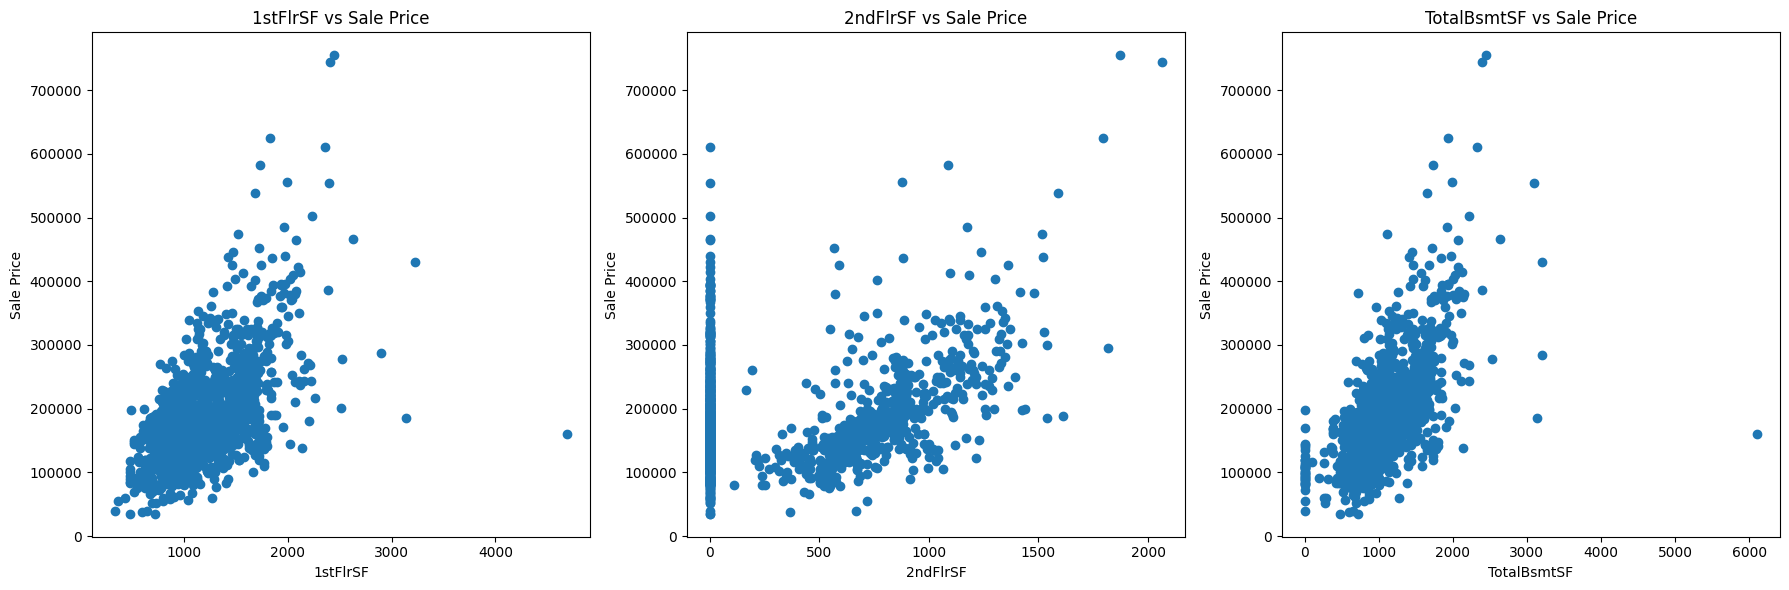

In [18]:
# Cria três subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot para 1stFlrSF
axes[0].scatter(df_train['1stFlrSF'], df_train['SalePrice'])
axes[0].set_xlabel('1stFlrSF')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('1stFlrSF vs Sale Price')

# Plot para 2ndFlrSF
axes[1].scatter(df_train['2ndFlrSF'], df_train['SalePrice'])
axes[1].set_xlabel('2ndFlrSF')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('2ndFlrSF vs Sale Price')

# Plot para TotalBsmtSF
axes[2].scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
axes[2].set_xlabel('TotalBsmtSF')
axes[2].set_ylabel('Sale Price')
axes[2].set_title('TotalBsmtSF vs Sale Price')

plt.tight_layout()
plt.show()

Relação entre o tamanho total da casa (TotalSqft) e o preço de venda da casa:

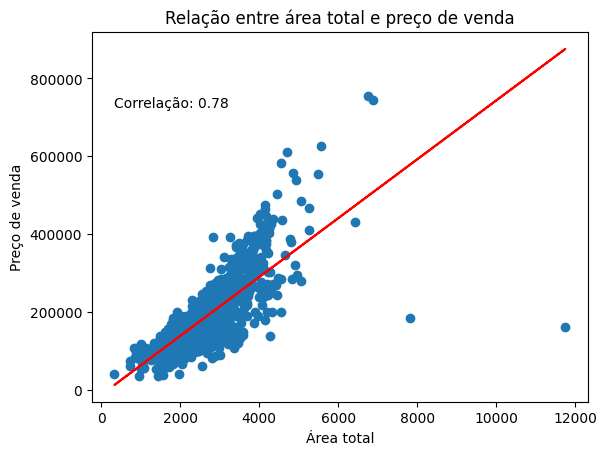

In [19]:
# Cria uma nova variável `TotalSqft` que é a soma das variáveis `1stFlrSF`, `2ndFlrSF` e `TotalBsmtSF`.
df_train['TotalSqft'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['TotalBsmtSF']

# Define a variável `sale_price` como o preço de venda da casa.
sale_price = df_train['SalePrice']

# Cria um gráfico de dispersão para a variável `TotalSqft` e o preço de venda.
plt.scatter(df_train['TotalSqft'], sale_price)
plt.xlabel('Área total')
plt.ylabel('Preço de venda')
plt.title('Relação entre área total e preço de venda')

# Calcula a linha de regressão entre as duas variáveis e a plota no gráfico.
regression_line = np.polyfit(df_train['TotalSqft'], sale_price, 1)
plt.plot(df_train['TotalSqft'], np.polyval(regression_line, df_train['TotalSqft']), color='red')

# Calcula a correlação entre as duas variáveis e a exibe no gráfico.
correlation = np.corrcoef(df_train['TotalSqft'], sale_price)[0, 1]
correlation_text = f'Correlação: {correlation:.2f}'
plt.text(df_train['TotalSqft'].min(), sale_price.max(), correlation_text, ha='left', va='top')

plt.show()

Ao criar esta variável composta, observa-se uma forte correlação e os dados apresentam menor dispersão (exceto alguns outliers, especialmente os 2 pontos no canto inferior direito). Recomenda-se usar essas variáveis ​​em conjunto e não separadamente.

In [20]:
# Seleciona as 10 maiores casas em termos de tamanho total
top_10_values = df_train['TotalSqft'].nlargest(10)

# Adiciona o preço de venda à lista
top_10_values = top_10_values.to_frame().join(df_train['SalePrice'])

# Imprime a lista
print(top_10_values)

      TotalSqft  SalePrice
1298      11752     160000
523        7814     184750
1182       6872     745000
691        6760     755000
496        6428     430000
1169       5557     625000
440        5496     555000
1353       5271     410000
1373       5266     466500
798        5066     485000


Os dois valores mais altos na lista, 11752 e 7814, são valores atípicos. A casa com tamanho total de 11752 tem um preço de venda de apenas 160.000 dólares, que é significativamente inferior ao que seria esperado para uma casa tão grande. Da mesma forma, a casa com tamanho total de 7814 tem um preço de venda de apenas 184.750 dólares.


O gráfico de dispersão mostrado anteriormente mostra que, em geral, há uma correlação positiva entre o tamanho total da casa (TotalSqft) e o preço de venda (SalePrice). Em outras palavras, casas maiores tendem a ter preços de venda mais altos.


No entanto, os dois valores mais altos na lista não seguem essa tendêncis
.

Existem várias possíveis explicações para essa discrepância. Uma possibilidade é que essas propriedades estejam localizadas em áreas com avaliações de propriedade mais baixas. Outra possibilidade é que essas propriedades sejam consideradas discrepantes, por exemplo, se tiverem problemas estruturais ou se forem usadas para fins comercia
is.

Para garantir uma análise mais precisa, é recomendável excluir esses valores de considerações posteriores. Isso ajudará a garantir que o modelo de aprendizado de máquina não seja influenciado por esses valores atípicos.

In [21]:
# Encontre os índices dos 2 valores mais altos
indices = df_train['TotalSqft'].nlargest(2).index

# Exclui as linhas com os índices identificados
df_train = df_train.drop(indices)

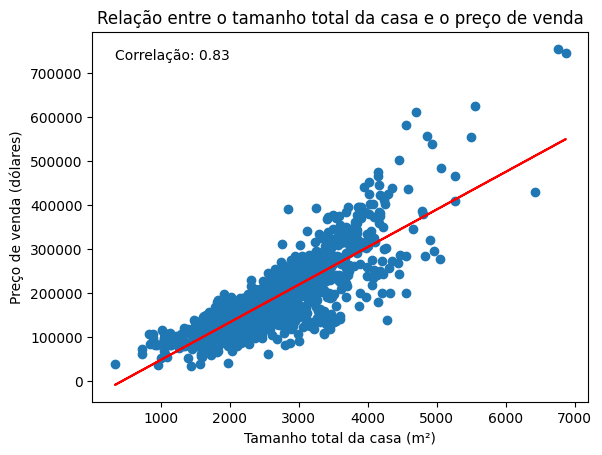

In [22]:
# Cria um scatter plot para mostrar a relação entre o tamanho total da casa (TotalSqft) e o preço de venda (SalePrice)
plt.scatter(df_train['TotalSqft'], df_train['SalePrice'], label='Dados')

# Configura os rótulos dos eixos e o título do gráfico
plt.xlabel('Tamanho total da casa (m²)')
plt.ylabel('Preço de venda (dólares)')
plt.title('Relação entre o tamanho total da casa e o preço de venda')

# Calcula a linha de regressão entre as duas variáveis
regression_line = np.polyfit(df_train['TotalSqft'], df_train['SalePrice'], 1)

# Plota a linha de regressão no gráfico
plt.plot(df_train['TotalSqft'], np.polyval(regression_line, df_train['TotalSqft']), color='red', label='Linha de regressão')

# Calcula a correlação entre as duas variáveis
correlation = np.corrcoef(df_train['TotalSqft'], df_train['SalePrice'])[0, 1]

# Exibe a correlação no gráfico
plt.text(df_train['TotalSqft'].min(), df_train['SalePrice'].max(), f'Correlação: {correlation:.2f}', ha='left', va='top')

# Exibe o gráfico
plt.show()

Ao excluir apenas dois registros, conseguimos reduzir a dispersão e melhorar a correlação entre as variáveis.

Também excluiremos a variável "GrLivArea" da análise, pois ela tem uma correlação menor com a variável alvo em comparação com a variável recém-criada "TotalSqft". Além disso, o "TotalSqft" fornece uma medida mais abrangente das propriedades, pois inclui a área do porão.

In [23]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalSqft
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,20,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,47,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,22,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,108,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,23,3343


# Pré-Processamento de dados 

In [24]:
# Verificação do tipo de dados existentes no dataframe
list(set(df_train.dtypes.tolist())) 

[dtype('float64'), dtype('O'), dtype('int64')]

> ***Classificando as variáveis ​​em numéricas e categóricas:***

In [25]:
# As variáveis numéricas são aquelas que representam quantidades ou medidas, como o tamanho da casa ou o número de quartos. 
# As variáveis categóricas são aquelas que representam categorias, como o tipo de construção ou o acabamento do porão.

numerical = pd.DataFrame(df_train, columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                                              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                                              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'TotalSqft'])
categorical = pd.DataFrame(df_train, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                                                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                                'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                                                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                                'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                                                'SaleCondition'])

Distribuição de frequência das variáveis numéricas no conjunto de dados:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fi

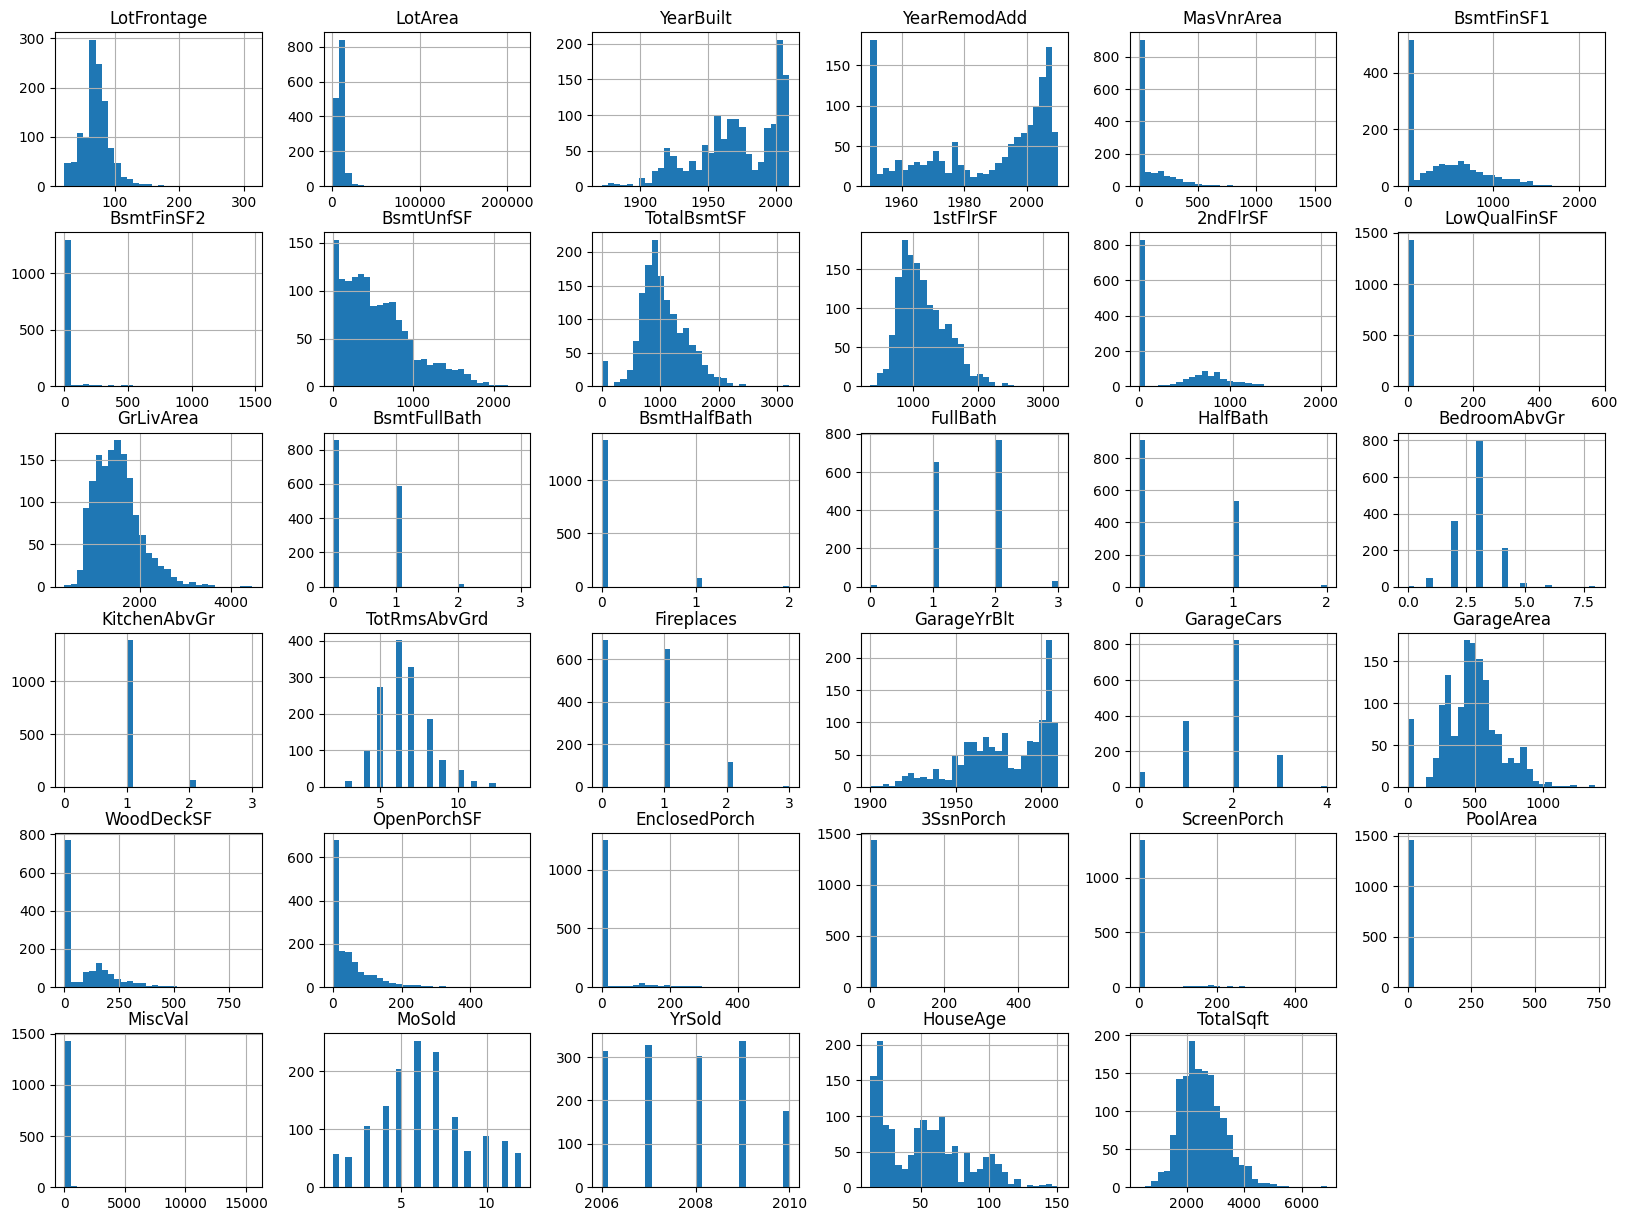

In [26]:
numerical.hist(figsize=(20,15),bins=30)

Após analise dos histogramas, determinou-se que serão excluídas variáveis ​​que possam ter impacto mínimo na análise estatística (por apresentarem desequilíbrio significativo na distribuição de suas categorias). As seguintes variáveis ​​numéricas serão excluídas:

'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [27]:
#número de colunas das variaveis categoricas
categorical.shape[1] 

46

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

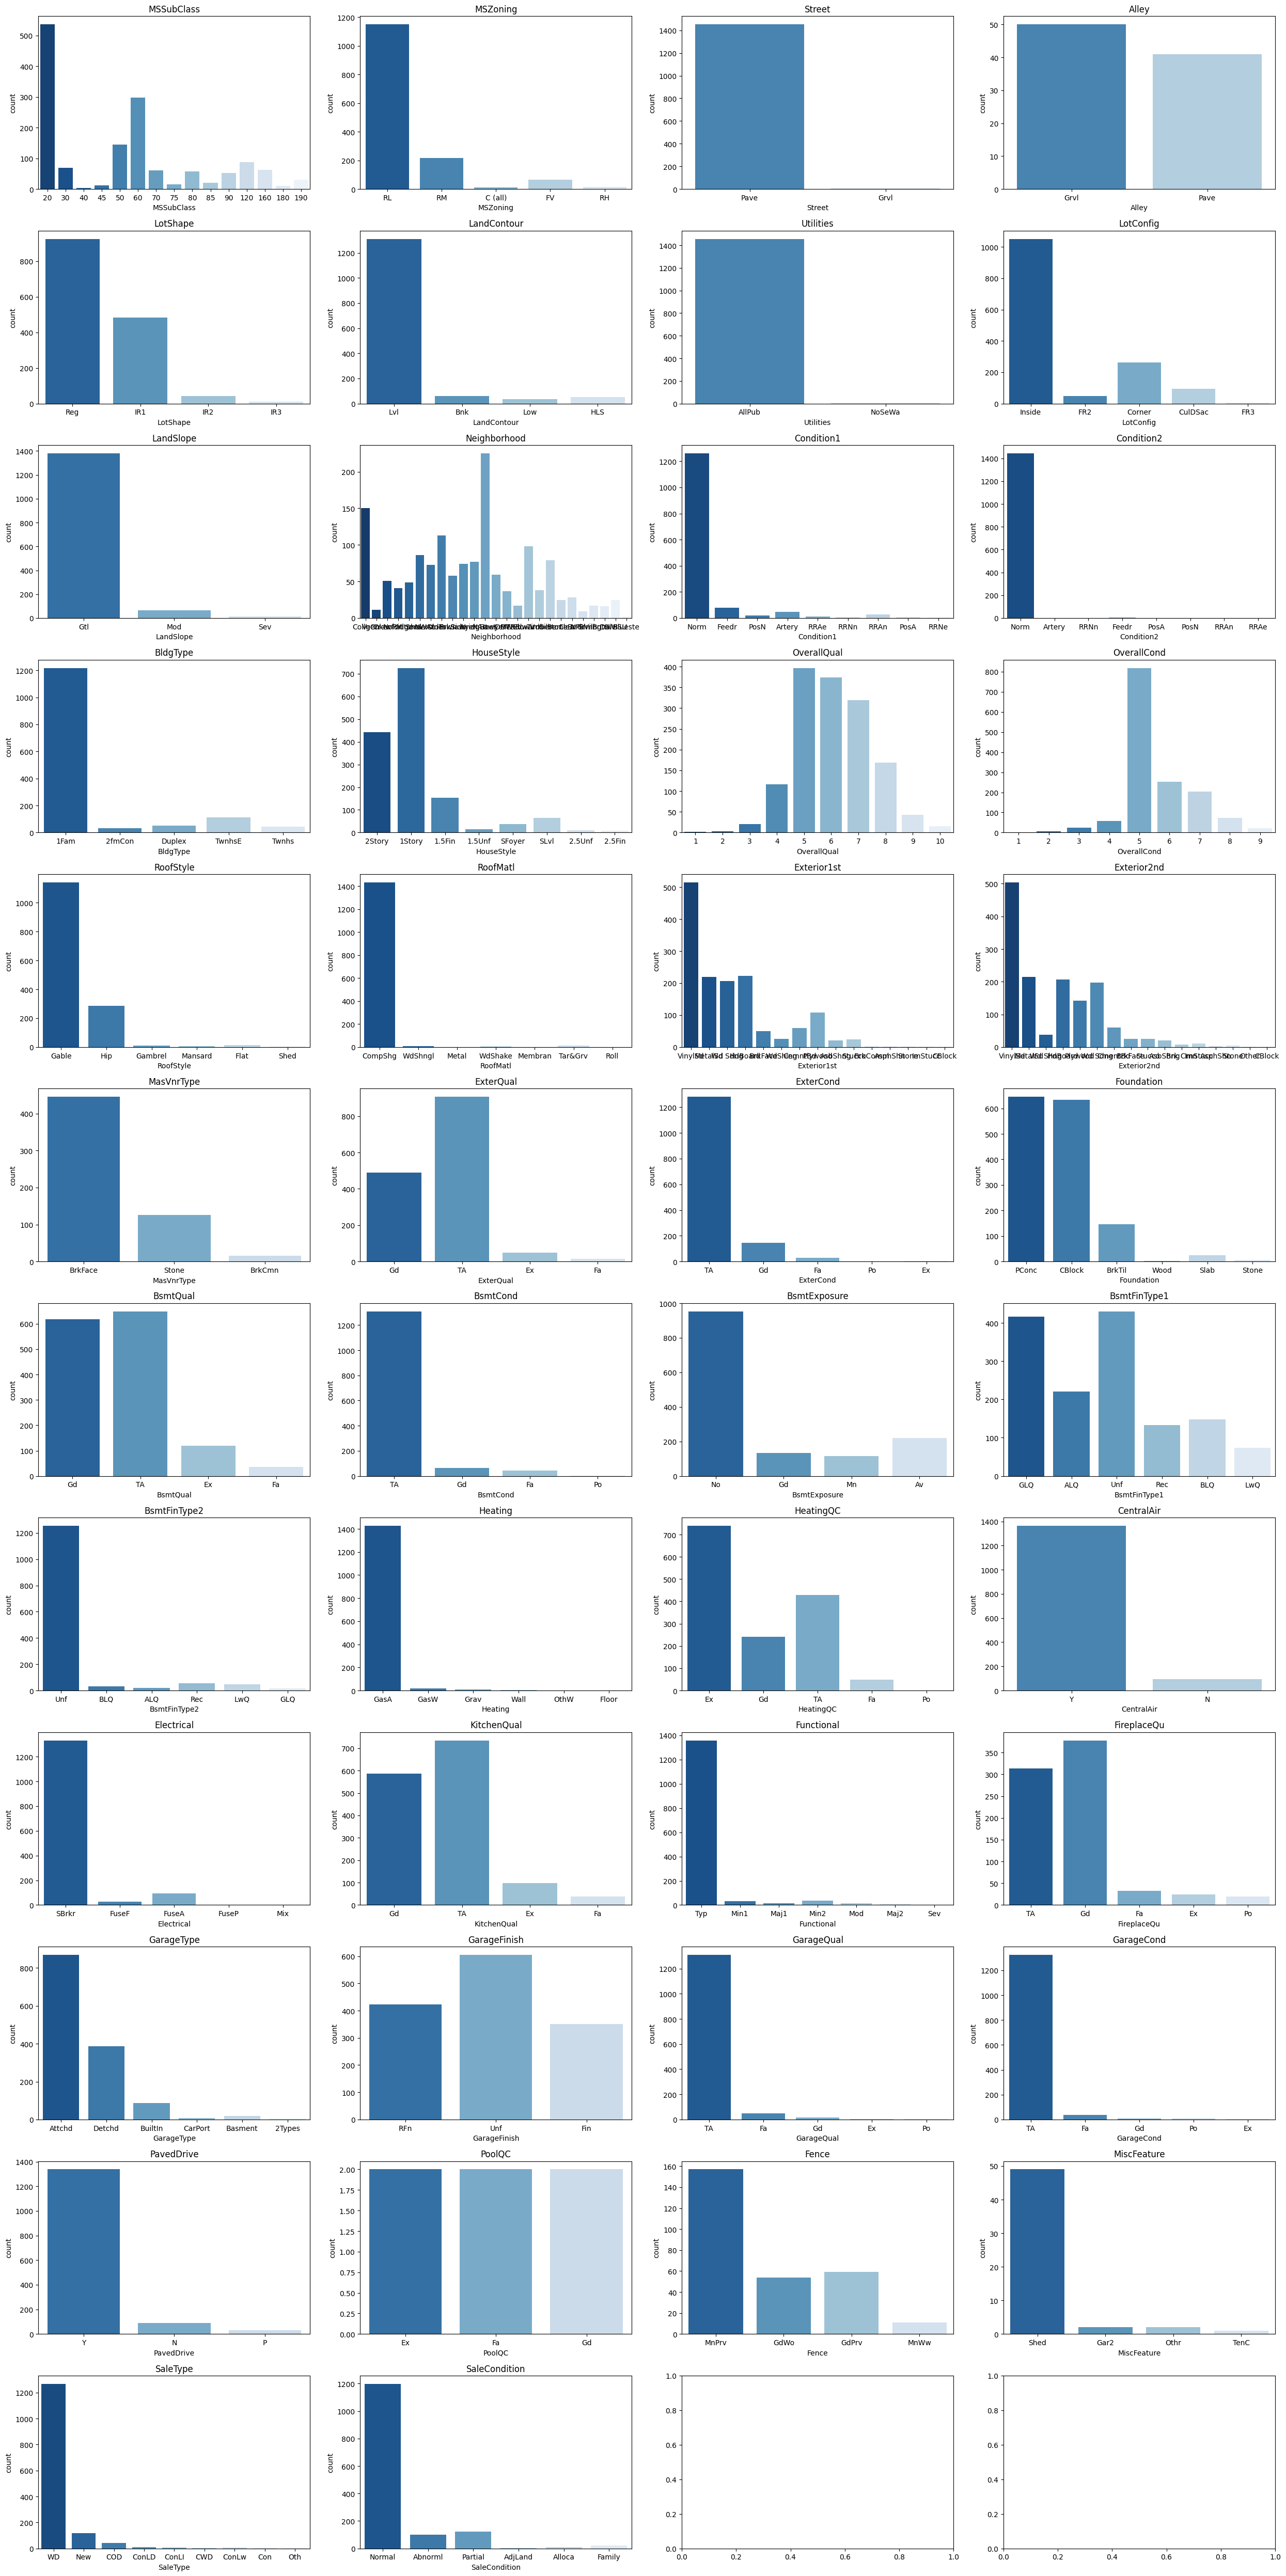

In [28]:
# Cria uma figura com 12 linhas e 4 colunas, e define o tamanho do gráfico
fig, ax = plt.subplots(12, 4, figsize=(25, 50))

# Itera sobre as variáveis categóricas
for i, subplots in zip(categorical, ax.flatten()):
    # Cria um gráfico de barras para a variável categórica `i`
    sns.countplot(data=categorical, x=categorical[i], ax=subplots, palette='Blues_r')

    # Define o título do gráfico
    subplots.set_title(categorical[i].name)

# Ajusta o layout do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()

Após análise dos dados, decidiu-se excluir variáveis ​​categóricas que provavelmente terão impacto limitado na análise estatística. Estas variáveis ​​apresentam um desequilíbrio significativo na sua distribuição, com a maioria dos valores concentrados numa categoria e muito poucos nas restantes categorias. As seguintes variáveis ​​categóricas serão eliminadas:


'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'

> ***Tratamento de valores ausentes:***

<Axes: >

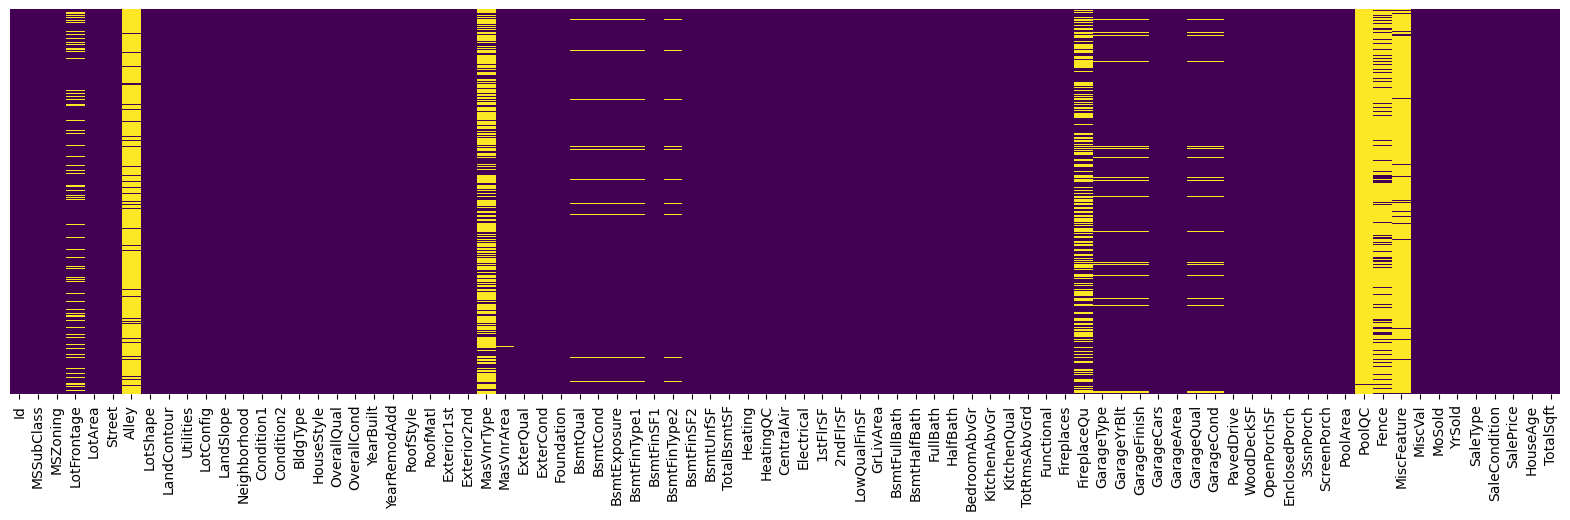

In [29]:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Baseado na análise do heatmap, foi tomada a decisão de excluir variáveis com um alto número de valores ausentes, bem como a variável de identificação 'Id', que não contribui para a análise.

As seguintes variáveis categóricas serão removidas: 'Alley', 'FireplaceQu', 'PoolQc', 'Fence' e 'MiscFeature'.

As variáveis restantes que contêm valores ausentes são: 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual' e 'GarageCond'.

Também removeremos as variáveis usadas para criar novas variáveis.
'1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearBuilt'

In [30]:
# Remoção de colunas
del_col = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
           'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'CentralAir', 'Electrical',  'Functional', 'GarageArea', 'GarageQual',
           'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea']

df_train.drop(del_col,axis=1,inplace=True)

<Axes: >

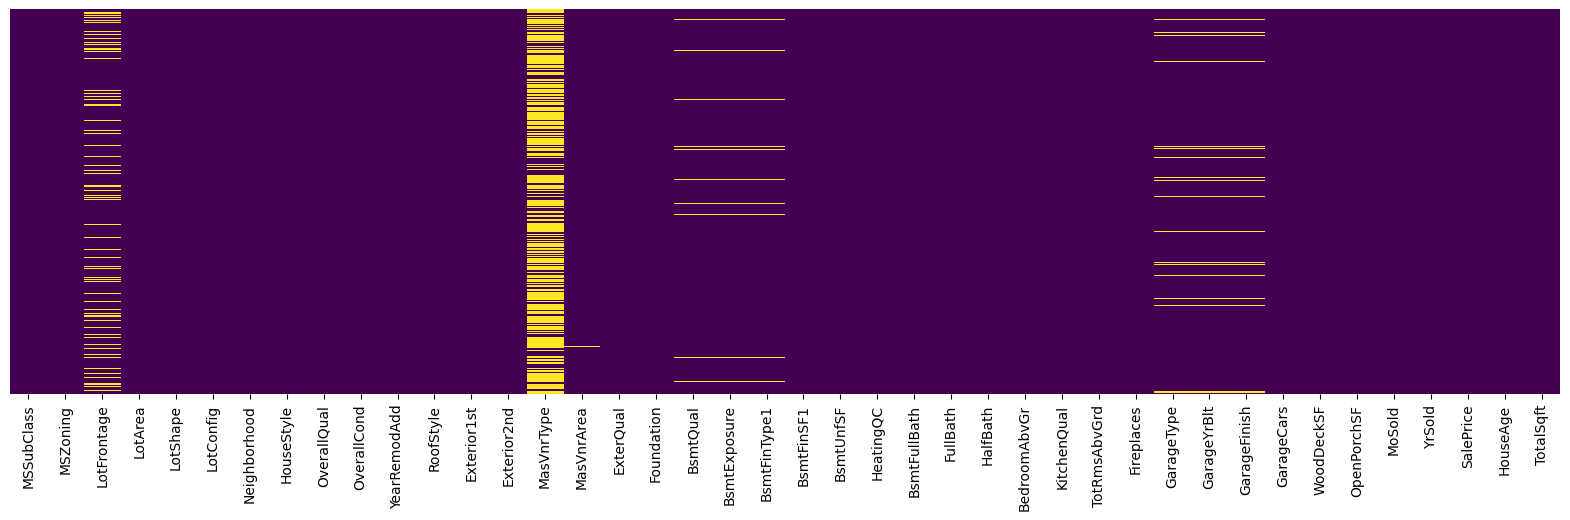

In [31]:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
cols = pd.DataFrame(df_train, columns=['LotFrontage', 'MasVnrType', 'MasVnrArea',
                                         'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                         'GarageType', 'GarageYrBlt', 'GarageFinish'])
                    
for c in cols:
    print(c,':', cols[c].isnull().sum())

LotFrontage : 259
MasVnrType : 872
MasVnrArea : 8
BsmtQual : 37
BsmtExposure : 38
BsmtFinType1 : 37
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81


In [33]:
print('Missing data:')
for c in cols:
    print(c,':',round(((cols[c].isnull().sum())*100/len(df_train)),1),'%')

Missing data:
LotFrontage : 17.8 %
MasVnrType : 59.8 %
MasVnrArea : 0.5 %
BsmtQual : 2.5 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.5 %
GarageType : 5.6 %
GarageYrBlt : 5.6 %
GarageFinish : 5.6 %


Usaremos a seguinte abordagem para resolver valores ausentes:

* Se um recurso tiver **mais de 20%** de dados ausentes, a variável será excluída.
* Para recursos com **menos de 20%** valores ausentes:
    *variáveis ​​numéricas: os valores faltantes serão preenchidos com a média ou mediana da variável.
    *variáveis ​​categóricas: os valores faltantes serão preenchidos com a categoria mais frequente.
* Para feições com **menos de 2%** valores faltantes, os registros faltantes serão excluídos.

Hipótese nula e alternativa podem ser usados para entender como preencher valores ausentes:

In [34]:
import scipy.stats as st

alpha = 0.05
k2, p = st.normaltest(df_train.LotFrontage, nan_policy='omit')

#Hipótese Nula: Os dados seguem uma distribuição normal.
#Hipótese Alternativa: Os dados não seguem uma distribuição normal.
print("p = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

p = 1.39712e-109
The null hypothesis can be rejected.


In [35]:
alpha = 0.05
#k2, p = print([stats.normaltest(cols[i]) for i in cols])
k2, p = st.normaltest(df_train.GarageYrBlt, nan_policy='omit')

#Null Hypothesis: The data follows a normal distribution.
#Alternative Hypothesis: The data does not follow a normal distribution.
print("p = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

p = 5.21756e-22
The null hypothesis can be rejected.


Quando o valor p é menor ou igual a alfa (0,05), implica que o valor p é pequeno o suficiente para rejeitar a hipótese nula (H0). Neste caso, concluímos que a amostra não segue uma distribuição normal. Como resultado, optamos por utilizar a mediana para preencher os valores faltantes nas variáveis ​​em consideração.

In [36]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(), inplace=True)

Para preencher as demais variáveis ​​categóricas, usaremos a moda.

In [37]:
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0], inplace=True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0], inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0], inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0], inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0], inplace=True)

MasVnrType, MasVnrArea – os registros serão excluídos.

In [38]:
df_train.dropna(axis=0, inplace=True)

<Axes: >

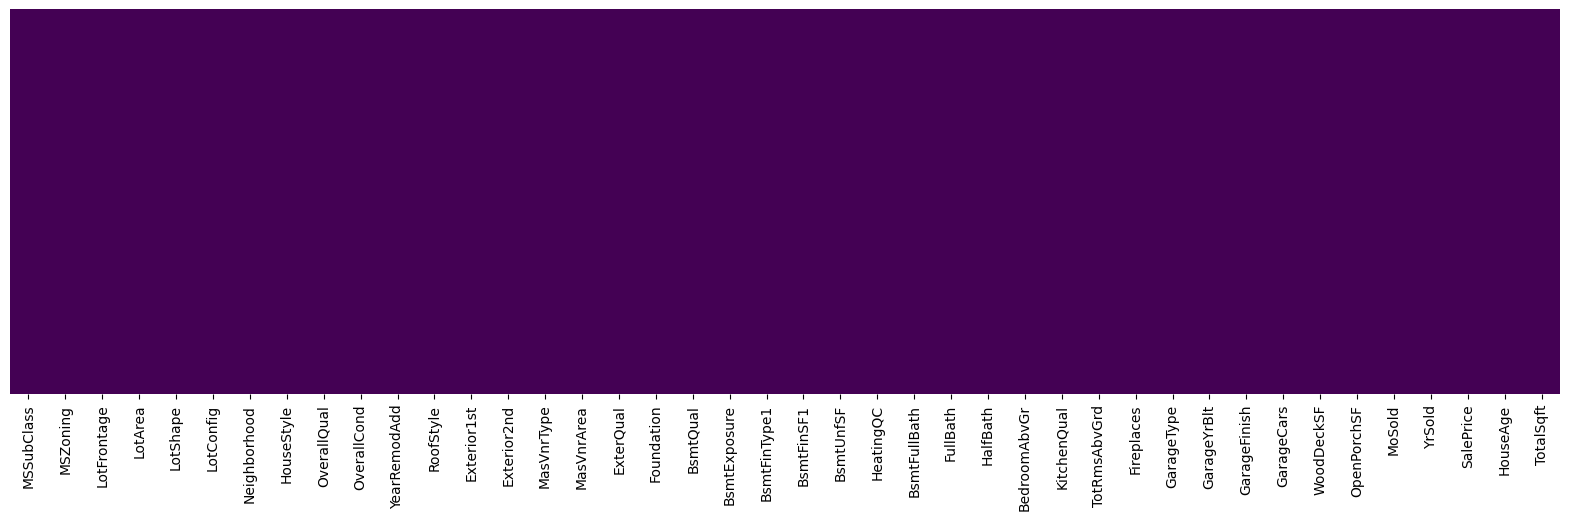

In [39]:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> ***Tratamento de Variáveis ​​Categóricas***

> Transforme variáveis ​​categóricas em um formato que possa ser facilmente interpretado por algoritmos de aprendizado de máquina.
>
> * Label Encoder: introduz uma ordenação arbitrária das categorias, por isso foi utilizado em variáveis ​​ordinais categóricas.
>
> * One-Hot Encoder: transforma variáveis ​​categóricas em uma representação vetorial binária. É útil em cenários onde a variável categórica não possui ordem inerente ou significância numérica, ou seja, variáveis ​​nominais categóricas.

In [40]:
# Importa a classe LabelEncoder do módulo sklearn.preprocessing.
from sklearn.preprocessing import LabelEncoder

# Cria uma lista de nomes de colunas que são variáveis categóricas ordinais.
ordinal_cols = ['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                'HeatingQC', 'KitchenQual', 'GarageFinish', 'RoofStyle']

# Cria um objeto LabelEncoder.
label_encoder = LabelEncoder()

# Itera sobre as variáveis categóricas ordinais.
for col in ordinal_cols:

    # Ajusta o objeto LabelEncoder aos valores na coluna.
    label_encoder.fit(df_train[col].astype(str))

    # Transforma os valores na coluna em valores codificados.
    df_train[col] = label_encoder.transform(df_train[col].astype(str))

In [41]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HouseAge,TotalSqft
0,60,RL,65.0,8450,2,Inside,CollgCr,2Story,5,3,...,2003.0,1,2,0,61,2,2008,208500,20,2566
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,5,3,...,2001.0,1,2,0,42,9,2008,223500,22,2706
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,6,3,...,2000.0,1,3,192,84,12,2008,250000,23,3343
6,20,RL,75.0,10084,2,Inside,Somerst,1Story,6,3,...,2004.0,1,2,255,57,8,2007,307000,19,3380
7,60,RL,69.0,10382,0,Corner,NWAmes,2Story,5,4,...,1973.0,1,2,235,204,11,2009,200000,50,3197


In [42]:
null_counts = df_train.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [43]:
# Importa o módulo OneHotEncoder do pacote sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# Seleciona as colunas que são categóricas
nominal_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']

# Cria um subconjunto das colunas categóricas
nominal_data = df_train[nominal_cols]

# Aplica a codificação de uma única hot
# drop='first': Remove a primeira coluna de cada variável categórica, pois ela é redundante.
# sparse=False: Retorna um DataFrame de dados não sparse.
# handle_unknown='ignore': Ignora os valores desconhecidos nas colunas categóricas.
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(nominal_data))

# Obtém os nomes das características após a codificação
feature_names = encoder.get_feature_names_out(nominal_cols)

# Atribui os nomes das características ao DataFrame codificado
encoded_data.columns = feature_names

# Reinicia o índice do DataFrame original e do DataFrame codificado
df_train.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

# Concatena o DataFrame codificado com o DataFrame original
df_train = pd.concat([df_train, encoded_data], axis=1)

In [44]:
# Elimina as colunas nominais originais do dataframe
df_train = df_train.drop(columns=nominal_cols)

In [45]:
null_counts = df_train.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


> ***Fazendo as mesmas alterações em df_test:***

In [46]:
df_test['HouseAge'] = current_year - df_test['YearBuilt']
df_test['TotalSqft'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['TotalBsmtSF']

In [47]:
# Remove colunas do conjunto de dados de teste
df_test.drop(del_col,axis=1,inplace=True)

In [48]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(), inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(), inplace=True)

In [49]:
df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0], inplace=True)
df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0], inplace=True)
df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0], inplace=True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0], inplace=True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0], inplace=True)

In [50]:
df_test.dropna(axis=0, inplace=True)

In [51]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HouseAge,TotalSqft
1,20,RL,81.0,14267,IR1,Corner,NAmes,1Story,6,6,...,Attchd,1958.0,Unf,1.0,393,36,6,2010,65,2658.0
3,60,RL,78.0,9978,IR1,Inside,Gilbert,2Story,6,6,...,Attchd,1998.0,Fin,2.0,360,36,6,2010,25,2530.0
11,160,RM,21.0,1680,Reg,Inside,BrDale,2Story,6,5,...,Detchd,1971.0,Unf,1.0,275,0,2,2010,52,1470.0
12,160,RM,21.0,1680,Reg,Inside,BrDale,2Story,5,5,...,Detchd,1997.0,Unf,1.0,0,0,3,2010,52,1617.0
15,60,RL,102.0,12858,IR1,Inside,NridgHt,2Story,9,5,...,Attchd,2009.0,Fin,3.0,144,133,1,2010,14,3924.0


In [52]:
for col in ordinal_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col].astype(str))

In [53]:
null_counts = df_test.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [54]:
# Selecione as colunas categóricas no df_test
nominal_data_test = df_test[nominal_cols]

# Aplique a codificação de uma única hot usando o codificador ajustado
encoded_data_test = pd.DataFrame(encoder.transform(nominal_data_test))

# Atribua os nomes das características aos dados de teste codificados
encoded_data_test.columns = feature_names

# Reinicie o índice do df_test original e dos dados de teste codificados
df_test.reset_index(drop=True, inplace=True)
encoded_data_test.reset_index(drop=True, inplace=True)

# Concatene os dados de teste codificados com os dados de teste originais
df_test = pd.concat([df_test, encoded_data_test], axis=1)

C:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 4, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [55]:
# Elimina as colunas nominais originais do dataframe
df_test = df_test.drop(columns=nominal_cols)

In [56]:
null_counts = df_test.isnull().sum()
null_vars = null_counts[null_counts > 0]
print(null_vars)

Series([], dtype: int64)


In [57]:
df_test.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,BsmtQual,...,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,81.0,14267,0,3,3,1958,2,108.0,3,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,78.0,9978,0,3,3,1998,1,20.0,3,3,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21.0,1680,3,3,2,1971,1,504.0,3,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21.0,1680,3,2,2,1971,1,492.0,3,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,102.0,12858,0,6,2,2010,1,162.0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# Cria um conjunto que contém os nomes das colunas no conjunto de dados de treinamento.
train_columns = set(df_train.columns)

# Cria um conjunto que contém os nomes das colunas no conjunto de dados de teste.
test_columns = set(df_test.columns)

# Cria um conjunto que contém as colunas presentes apenas no conjunto de dados de treinamento.
# O conjunto `train_columns` é subtraído do conjunto `test_columns`.
train_only_variables = train_columns - test_columns

# Cria um conjunto que contém as colunas presentes apenas no conjunto de dados de teste.
# O conjunto `test_columns` é subtraído do conjunto `train_columns`.
test_only_variables = test_columns - train_columns

# Imprime as variáveis presentes apenas no conjunto de dados de treinamento.
print("Variables present only in train_data:")
print(train_only_variables)

# Imprime as variáveis presentes apenas no conjunto de dados de teste.
print("\nVariables present only in test_data:")
print(test_only_variables)

Variables present only in train_data:
{'SalePrice'}

Variables present only in test_data:
set()




# MACHINE LEARNING



In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# separando as variáveis de resposta (y) das variáveis de entrada (X).
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Regressão Linear:

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
# imprime a interceptação – o preço da casa quando todas as variáveis ​​independentes são zero
print(lm.intercept_)

-90649.34883558936


In [68]:
# Cria um DataFrame que contém os coeficientes do modelo de regressão linear.
# Os coeficientes são os valores que multiplicam as variáveis independentes no modelo.
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

# Imprime o DataFrame dos coeficientes.
# Isso pode ser útil para entender o efeito das variáveis independentes no preço da casa.
print(coeff_df.to_string())

                        Coefficient
LotFrontage              260.847959
LotArea                    0.561204
LotShape               -2372.157001
OverallQual            -2977.709063
OverallCond            11658.266627
YearRemodAdd            -266.059839
RoofStyle                893.843775
MasVnrArea                31.875964
ExterQual              -3884.034822
BsmtQual               -7201.921000
BsmtExposure           -3005.506181
BsmtFinType1            1421.888765
BsmtFinSF1                -8.667787
BsmtUnfSF                -35.321108
HeatingQC               2240.961499
BsmtFullBath           -2544.605560
FullBath                 716.157762
HalfBath               -1112.131355
BedroomAbvGr           -8386.363577
KitchenQual           -10364.307217
TotRmsAbvGrd             767.934465
Fireplaces              2307.161386
GarageYrBlt              426.630680
GarageFinish             473.547683
GarageCars              9400.744601
WoodDeckSF               -10.716958
OpenPorchSF               26

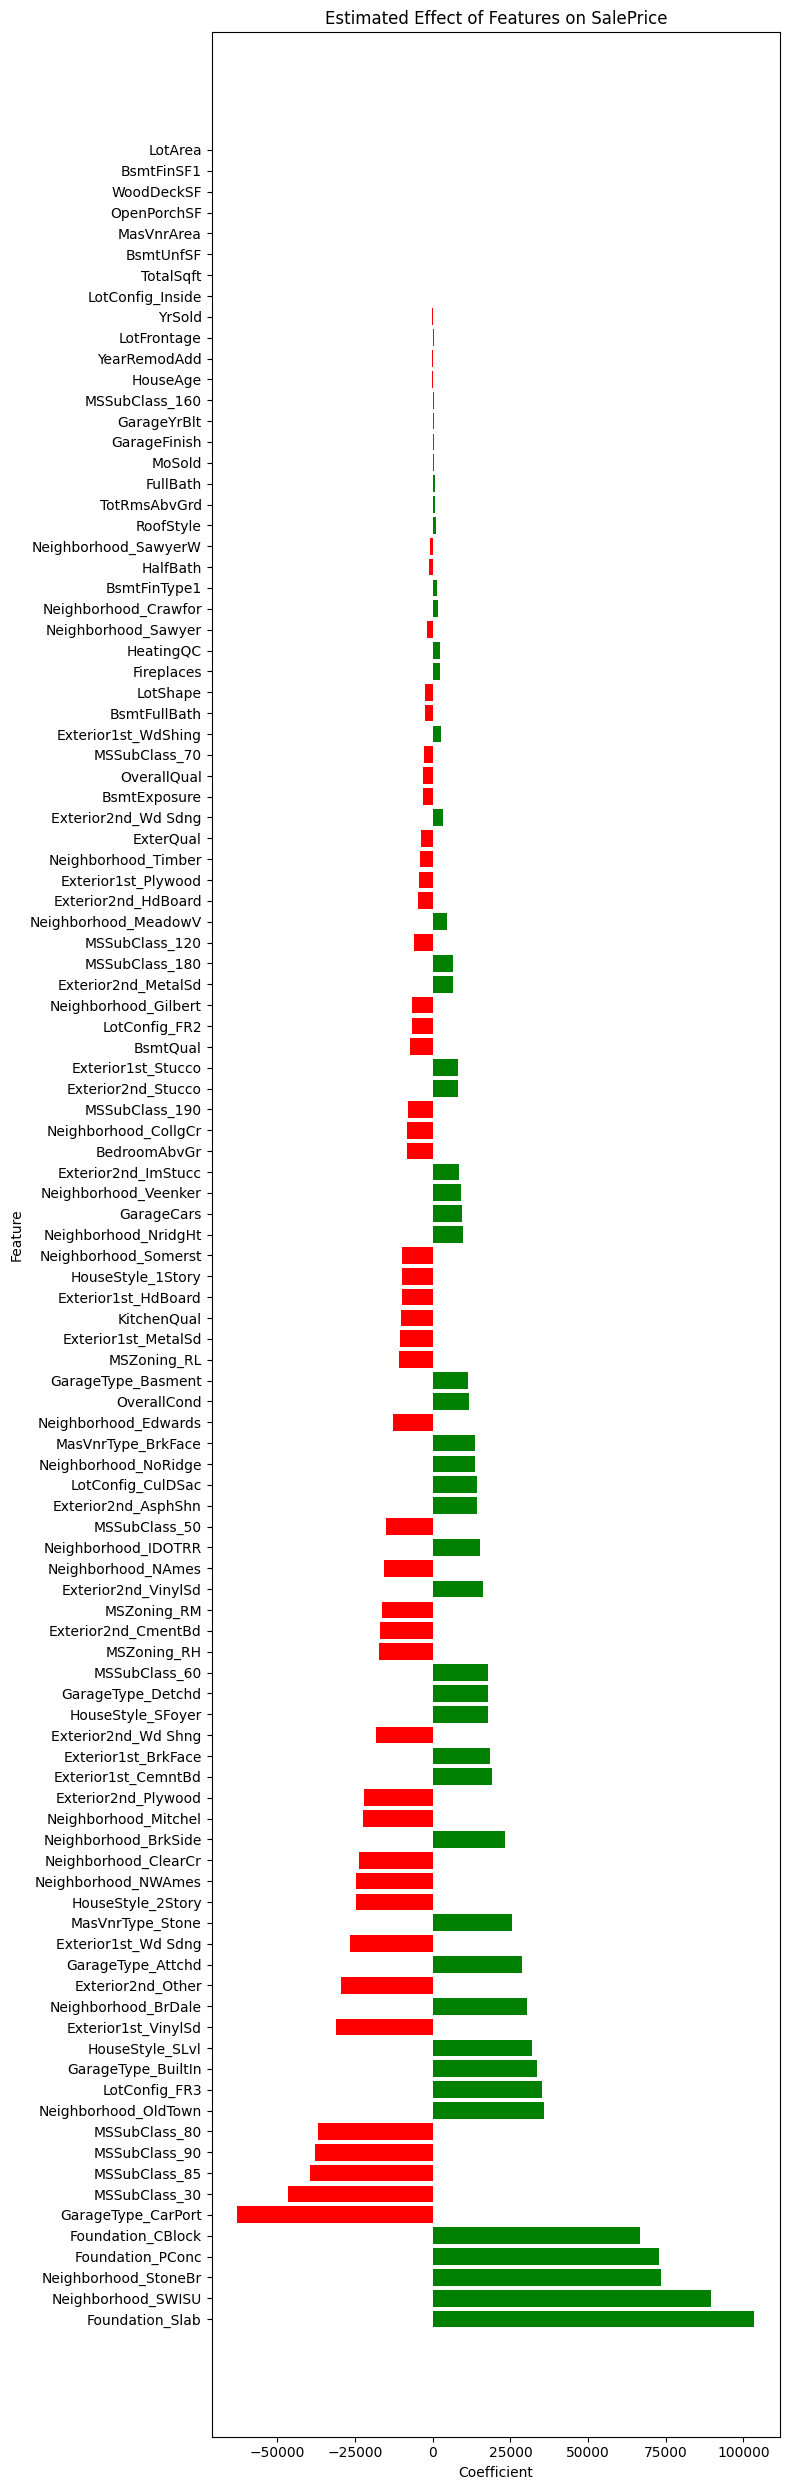

In [70]:
# Ordena os coeficientes pelo valor absoluto em ordem decrescente
sorted_coeffs = coeff_df['Coefficient'].abs().sort_values(ascending=False)

# Determina as cores das barras com base nos valores dos coeficientes
colors = np.where(coeff_df.loc[sorted_coeffs.index, 'Coefficient'] >= 0, 'green', 'red')

# Cria um gráfico de barras vertical dos coeficientes
plt.figure(figsize=(8, 25))
plt.barh(range(len(sorted_coeffs)), coeff_df.loc[sorted_coeffs.index, 'Coefficient'], color=colors)
plt.yticks(range(len(sorted_coeffs)), sorted_coeffs.index)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Estimated Effect of Features on SalePrice')
plt.tight_layout()
plt.show()


In [71]:
predictions = lm.predict(X_test)

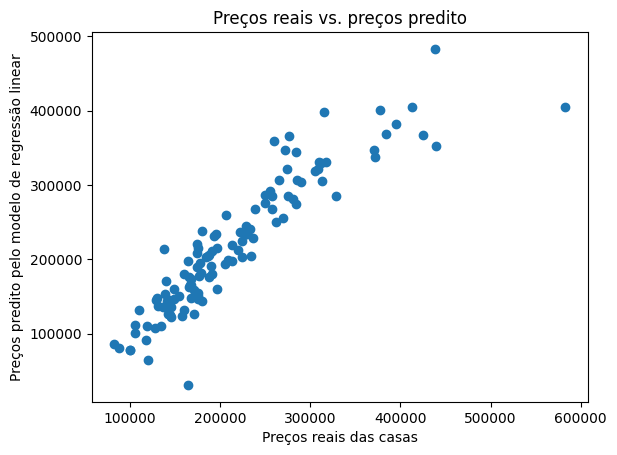

In [73]:
# Cria um gráfico de dispersão das previsões do modelo de regressão linear em relação aos valores reais dos preços das casas no conjunto de dados de teste.
plt.scatter(y_test, predictions)

# Define as legendas do gráfico.
plt.xlabel("Preços reais das casas")
plt.ylabel("Preços predito pelo modelo de regressão linear")

# Define o título do gráfico.
plt.title("Preços reais vs. preços predito")

# Exibe o gráfico.
plt.show()


Uma linha diagonal perfeita indicaria 100% de correspondência entre os valores previstos e os valores reais. Nos dados plotados, podemos observar uma linha quase diagonal; no entanto, os pontos de dados estão ligeiramente dispersos em torno da linha central.

In [74]:
from sklearn import metrics

In [76]:
# Calcula o erro absoluto médio (MAE) entre as previsões e os valores reais.
# Um valor MAE baixo indica que as previsões estão próximas dos valores reais.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# Calcula o erro quadrático médio (MSE) entre as previsões e os valores reais.
# Um valor MSE baixo indica que as previsões estão próximas dos valores reais.
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# Calcula a raiz do erro quadrático médio (RMSE) entre as previsões e os valores reais.
# Um valor RMSE baixo indica que as previsões estão próximas dos valores reais.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25064.799157762063
MSE: 1340932029.1568282
RMSE: 36618.73877070083


MAE – Erro Médio Absoluto: é apenas o erro médio

MSE – Mean Squared Error: “pune” erros maiores, o que tende a ser útil em dados do mundo real

RMSE - Root Mean Squared Error: é interpretável nas unidades “y”

O objetivo é minimizar todos esses valores para criar o melhor modelo.

RANDOM FOREST:

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
# Define a variável alvo
target_variable = 'SalePrice'

In [79]:
# Divida os dados em features (X) e alvo (y)
X = df_train.drop(target_variable, axis=1)
y = df_train[target_variable]

In [80]:
# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Cria o modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [82]:
# Fita o modelo
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [83]:
# Faz previsões nos dados de teste
predictions = random_forest.predict(X_test)

In [84]:
# Avalia o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 23586.627786435107
MSE: 1805994371.8212097
RMSE: 42496.992503249094


In [85]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance (relative) in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))

         Feature  Importance
30     TotalSqft    0.524227
3    OverallQual    0.150041
24    GarageCars    0.047340
9       BsmtQual    0.037441
19   KitchenQual    0.032238
5   YearRemodAdd    0.028379
29      HouseAge    0.024464
12    BsmtFinSF1    0.021242
1        LotArea    0.015393
13     BsmtUnfSF    0.015024


A variável que teve maior impacto no modelo foi TotalSqft, seguida de OverallQual. Isso é altamente lógico e se alinha bem com as observações do mundo real.

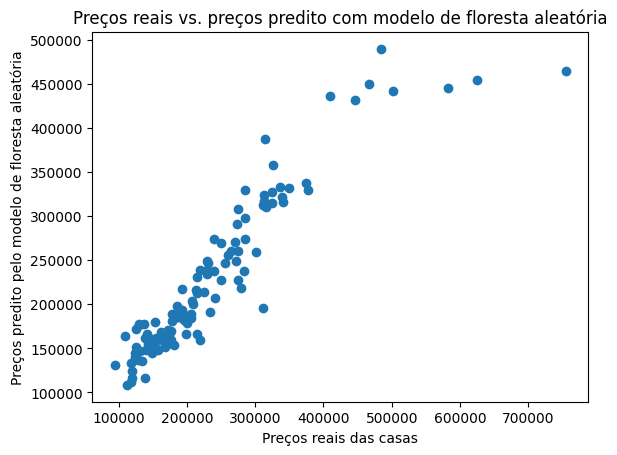

In [86]:
# Cria um gráfico de dispersão das previsões do modelo de floresta aleatória em relação aos valores reais dos preços das casas no conjunto de dados de teste.
plt.scatter(y_test, predictions)

# Define as legendas do gráfico.
plt.xlabel('Preços reais das casas')
plt.ylabel('Preços predito pelo modelo de floresta aleatória')

# Define o título do gráfico.
plt.title('Preços reais vs. preços predito com modelo de floresta aleatória')

# Mostra o gráfico.
plt.show()


In [87]:
# Apply the trained model to make predictions
predicted_prices = random_forest.predict(df_test)

In [88]:
# Avalia o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 23586.627786435107
MSE: 1805994371.8212097
RMSE: 42496.992503249094
